# Data Loading and Pre-processing for CNN Model

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import CategoricalAccuracy, BinaryAccuracy, Precision, Recall, AUC
from tensorflow.keras.models import load_model

In [2]:
train_classes=os.listdir('PlantVillage')
train_classes

['Tomato_healthy',
 'Potato___Early_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Potato___Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Tomato_mosaic_virus',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Bacterial_spot',
 'Tomato_Late_blight',
 'Pepper__bell___healthy',
 'Potato___healthy']

In [3]:
import splitfolders
db_path='PlantVillage'
splitfolders.ratio(db_path, output="s_data", seed=1337, ratio=(.7,.3))

Copying files: 20639 files [00:07, 2658.63 files/s]


In [3]:
batch_size=128
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    's_data/train',
    target_size=(200, 200),
    batch_size=batch_size,
    classes = train_classes,
    class_mode='categorical'
)
val_datagen=ImageDataGenerator(rescale=1/255)
val_generator=val_datagen.flow_from_directory(
    's_data/val',
    target_size=(200, 200),
    batch_size=batch_size,
    classes = train_classes,
    class_mode='categorical'
)

Found 14440 images belonging to 15 classes.
Found 6198 images belonging to 15 classes.


# CNN Model Creation

In [4]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(15, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 198, 198, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 97, 97, 32)        128       
 chNormalization)                                                
                                                        

In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=['accuracy', Precision(), Recall(), AUC(),CategoricalAccuracy()])

# CNN Model Training

In [9]:
history=model.fit(
    x=train_generator,
    y=None,
    epochs=12,
    validation_data=val_generator
)

Epoch 1/12
113/113 [==============================] - 160s 1s/step - loss: 0.0847 - accuracy: 0.9704 - precision: 0.9737 - recall: 0.9667 - auc: 0.9995 - categorical_accuracy: 0.9704 - val_loss: 0.8390 - val_accuracy: 0.7594 - val_precision: 0.7867 - val_recall: 0.7422 - val_auc: 0.9677 - val_categorical_accuracy: 0.7594
Epoch 2/12
113/113 [==============================] - 162s 1s/step - loss: 0.0758 - accuracy: 0.9740 - precision: 0.9770 - recall: 0.9713 - auc: 0.9997 - categorical_accuracy: 0.9740 - val_loss: 0.6434 - val_accuracy: 0.8370 - val_precision: 0.8528 - val_recall: 0.8283 - val_auc: 0.9757 - val_categorical_accuracy: 0.8370
Epoch 3/12
113/113 [==============================] - 165s 1s/step - loss: 0.0473 - accuracy: 0.9845 - precision: 0.9860 - recall: 0.9827 - auc: 0.9997 - categorical_accuracy: 0.9845 - val_loss: 0.5128 - val_accuracy: 0.8596 - val_precision: 0.8679 - val_recall: 0.8522 - val_auc: 0.9832 - val_categorical_accuracy: 0.8596
Epoch 4/12
113/113 [===========

# Saving of Trained CNN Model

In [10]:
model.save('PlantDiseaseModel.h5')

# Evaluation of CNN Model

In [12]:
model.evaluate(val_generator)

49/49 [==============================] - 13s 260ms/step - loss: 0.3502 - accuracy: 0.9124 - precision: 0.9164 - recall: 0.9096 - auc: 0.9876 - categorical_accuracy: 0.9124


[0.3501870632171631,
 0.9123910665512085,
 0.9164499640464783,
 0.9096482992172241,
 0.9876241087913513,
 0.9123910665512085]

# Bar Graph Representing Various Metrics of CNN Models Performance

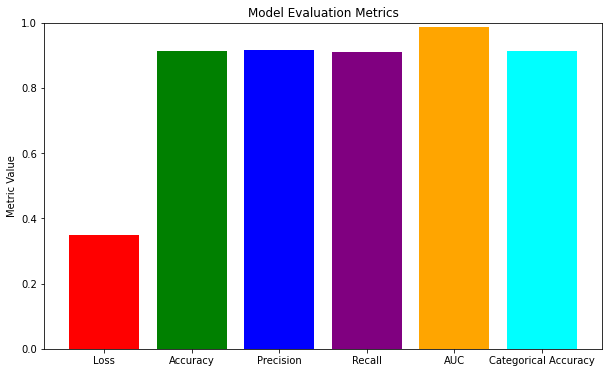

In [13]:
metrics = [0.3501870632171631,
           0.9123910665512085,
           0.9164499640464783,
           0.9096482992172241,
           0.9876241087913513,
           0.9123910665512085]


metric_names = ['Loss', 'Accuracy', 'Precision', 'Recall', 'AUC', 'Categorical Accuracy']

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['red', 'green', 'blue', 'purple', 'orange', 'cyan'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Metric Value')
plt.ylim([0, 1])  
plt.show()

# Confusion Matrix for CNN Model

In [14]:
cnn_model = load_model('PlantDiseaseModel.h5')

In [15]:
val_datagen=ImageDataGenerator(rescale=1./255)
val_generator=val_datagen.flow_from_directory(
    's_data/val',
    target_size=(200, 200),
    batch_size=128,
    classes = train_classes,
    class_mode='categorical',
    shuffle=False
)

Found 6198 images belonging to 15 classes.


In [17]:
predictions = cnn_model.predict(val_generator)

2023-12-07 18:07:34.659461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 9s 134ms/step


In [18]:
true_labels = val_generator.classes
predicted_labels = predictions.argmax(axis=1)

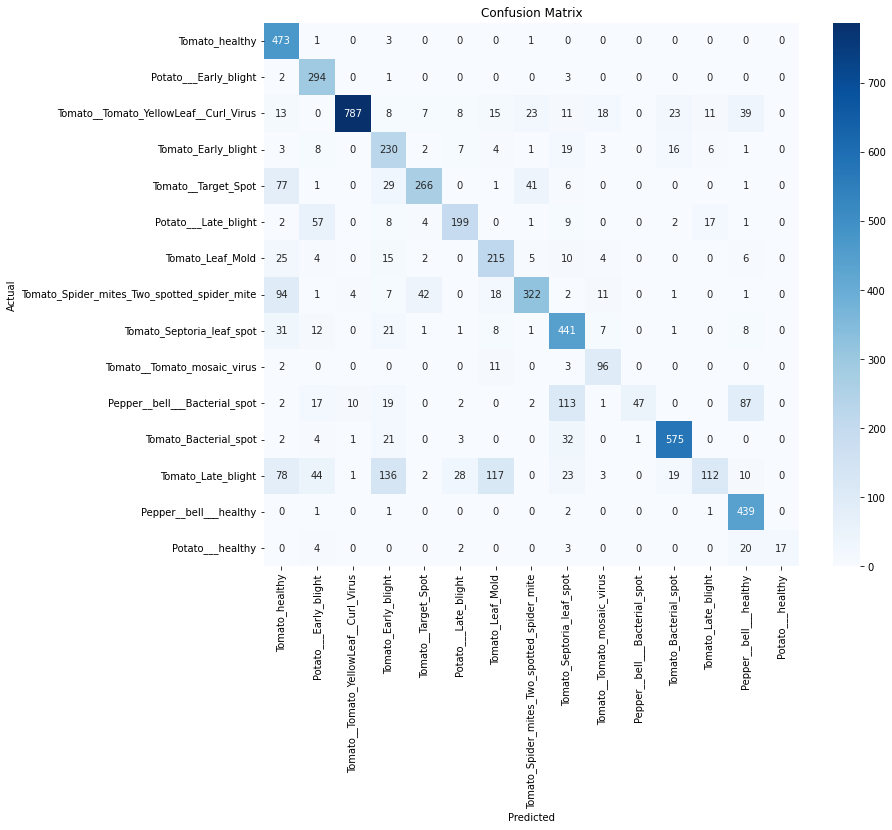

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Data Pre-processing for Classifiers

In [1]:
import numpy as np
import os
from PIL import Image
from skimage.transform import resize

folder='PlantVillage'
images = []
for filename in os.listdir(folder):
    img_path = os.path.join(folder, filename)
    for im in os.listdir(img_path):
        try:
            im_path=os.path.join(img_path,im)
            img = Image.open(im_path)  
            img= np.array(img)
            img = resize(img,(100,100), anti_aliasing=True)
            img_flat = img.flatten()
            images.append(img_flat)
        except Exception as e:
            os.remove(im_path)


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
images= pad_sequences(images, dtype='float32', padding='post')
images= np.array(images)

In [3]:
labels = []
class_names = os.listdir(folder)
for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    if os.path.isdir(class_path):
        label = class_names.index(class_name)
        labels.extend([label] * len(os.listdir(class_path)))
labels=np.array(labels)
labels.size

20638

In [4]:
from sklearn.model_selection import train_test_split
data=images
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
predictions = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6881459948320413


In [9]:
import joblib
joblib.dump(clf, 'rf_plantdisease_model.joblib')

['rf_plantdisease_model.joblib']

# Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

DTclf = DecisionTreeClassifier()
DTclf.fit(X_train, y_train)

predictions = DTclf.predict(X_test)

In [9]:
import joblib
joblib.dump(DTclf, 'DTclf_plantdisease_model.joblib')

['DTclf_plantdisease_model.joblib']

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.4082687338501292


# Confusion matrix for Random Forest

In [12]:
import joblib
rf_model = joblib.load('rf_plantdisease_model.joblib')

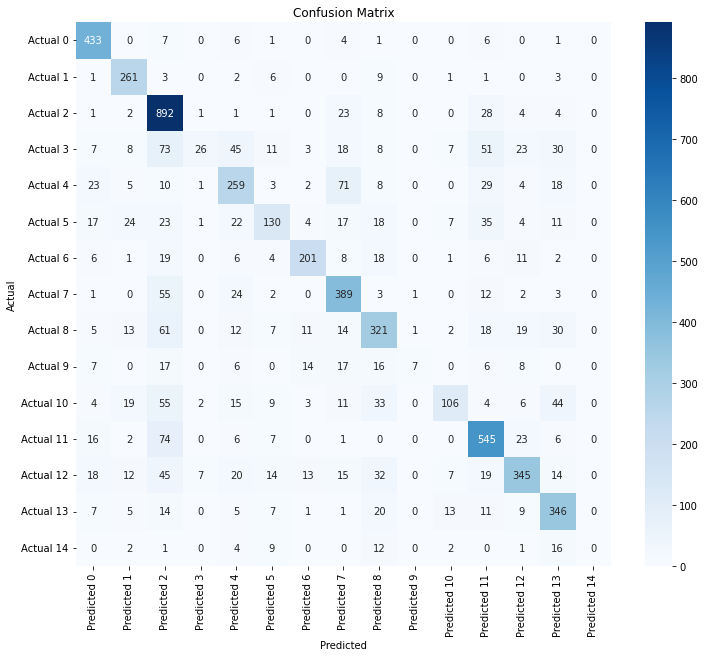

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = rf_model.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Predicted {i}' for i in range(15)], yticklabels=[f'Actual {i}' for i in range(15)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Confusion Matrix for Decision Tree

In [14]:
import joblib
dt_model=joblib.load('DTclf_plantdisease_model.joblib')

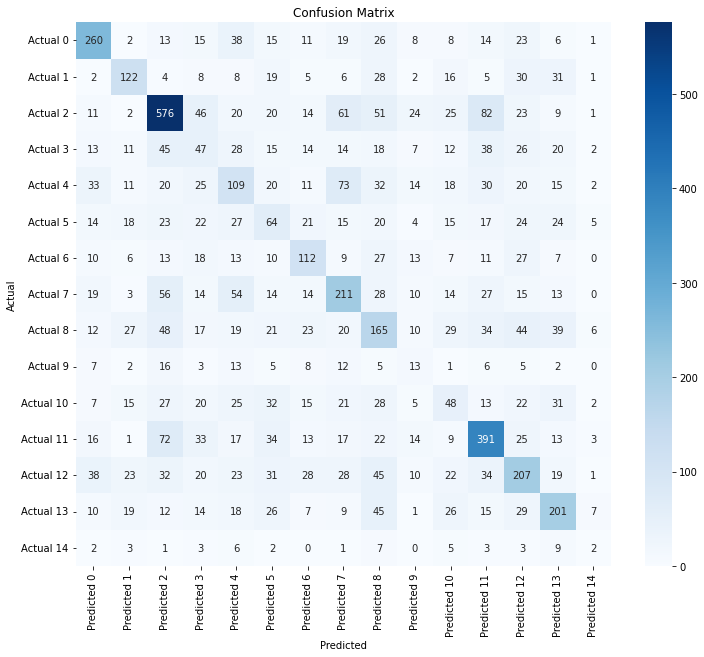

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = dt_model.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Predicted {i}' for i in range(15)], yticklabels=[f'Actual {i}' for i in range(15)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## ViT Model

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

In [2]:
def set_seeds(seed: int=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
import os
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT 

pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False
class_names = os.listdir("PlantVillage1")

set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)
pretrained_vit

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [5]:
class_names

['Tomato_healthy',
 'Potato___Early_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Potato___Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Tomato_mosaic_virus',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Bacterial_spot',
 'Tomato_Late_blight',
 'Pepper__bell___healthy',
 'Potato___healthy']

In [6]:
train_dir = 'PlantVillage/train'
test_dir = 'PlantVillage/test'

In [7]:
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [8]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str, 
    test_dir: str, 
    transform: transforms.Compose, 
    batch_size: int, 
    num_workers: int=NUM_WORKERS
):

  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  class_names = train_data.classes
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

In [9]:
train_dataloader_pretrained, test_dataloader_pretrained, class_names = create_dataloaders(train_dir=train_dir,test_dir=test_dir,transform=pretrained_vit_transforms,batch_size=32)

In [12]:
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(), 
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_pretrained,
                                      test_dataloader=test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

 10%|████                                    | 1/10 [32:09<4:49:23, 1929.29s/it]

Epoch: 1 | train_loss: 0.5264 | train_acc: 0.8718 | test_loss: 0.2340 | test_acc: 0.9439


 20%|███████▌                              | 2/10 [1:04:36<4:18:37, 1939.70s/it]

Epoch: 2 | train_loss: 0.1889 | train_acc: 0.9531 | test_loss: 0.1631 | test_acc: 0.9551


 30%|███████████▍                          | 3/10 [1:37:00<3:46:32, 1941.84s/it]

Epoch: 3 | train_loss: 0.1328 | train_acc: 0.9678 | test_loss: 0.1268 | test_acc: 0.9647


 40%|███████████████▏                      | 4/10 [2:10:34<3:17:02, 1970.36s/it]

Epoch: 4 | train_loss: 0.1035 | train_acc: 0.9756 | test_loss: 0.1103 | test_acc: 0.9701


 50%|███████████████████                   | 5/10 [2:43:47<2:44:51, 1978.38s/it]

Epoch: 5 | train_loss: 0.0853 | train_acc: 0.9805 | test_loss: 0.0932 | test_acc: 0.9735


 60%|██████████████████████▊               | 6/10 [3:19:22<2:15:26, 2031.60s/it]

Epoch: 6 | train_loss: 0.0717 | train_acc: 0.9846 | test_loss: 0.0888 | test_acc: 0.9743


 70%|██████████████████████████▌           | 7/10 [3:57:24<1:45:40, 2113.54s/it]

Epoch: 7 | train_loss: 0.0611 | train_acc: 0.9877 | test_loss: 0.0818 | test_acc: 0.9762


 80%|██████████████████████████████▍       | 8/10 [4:33:24<1:10:56, 2128.34s/it]

Epoch: 8 | train_loss: 0.0539 | train_acc: 0.9883 | test_loss: 0.0738 | test_acc: 0.9791


 90%|████████████████████████████████████    | 9/10 [5:14:33<37:14, 2234.80s/it]

Epoch: 9 | train_loss: 0.0466 | train_acc: 0.9915 | test_loss: 0.0721 | test_acc: 0.9781


100%|███████████████████████████████████████| 10/10 [5:46:25<00:00, 2078.60s/it]

Epoch: 10 | train_loss: 0.0417 | train_acc: 0.9925 | test_loss: 0.0666 | test_acc: 0.9811


In [14]:
torch.save(pretrained_vit, 'majortrained_vit.pth')

In [2]:
model = torch.load('majortrained_vit.pth')
model.eval()  

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [15]:
def make_predictions(model, dataloader, device):
    model.eval()
    actual_labels = []  
    predicted_labels = [] 
    
    for images, labels in dataloader:
        images = images.to(device)  
        labels = labels.tolist()  
        actual_labels.extend(labels)  
        with torch.no_grad():  
            outputs = model(images) 
            _, predicted = torch.max(outputs, 1)  
            predicted_labels.extend(predicted.tolist())  

    return actual_labels,predicted_labels

actual,predicted= make_predictions(model, test_dataloader_pretrained, device)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(actual, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.9810825013137152


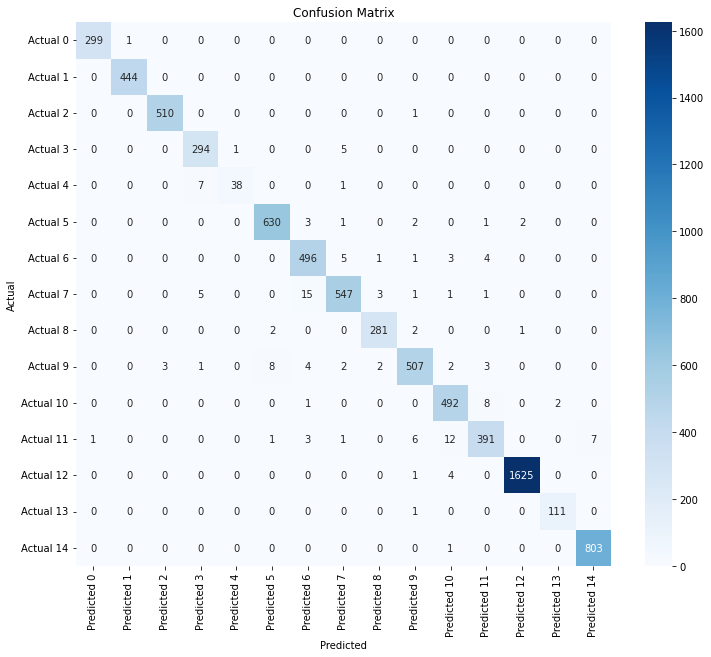

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(actual, predicted)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Predicted {i}' for i in range(15)], yticklabels=[f'Actual {i}' for i in range(15)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


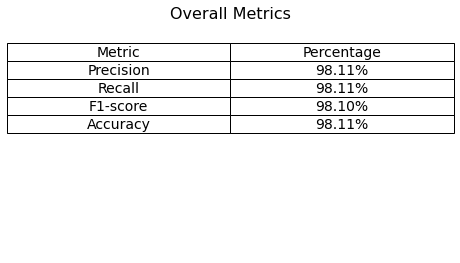

In [59]:
import numpy as np
import matplotlib.pyplot as plt


report = classification_report(actual, predicted, output_dict=True)

overall_precision = report['weighted avg']['precision']
overall_recall = report['weighted avg']['recall']
overall_f1_score = report['weighted avg']['f1-score']
accuracy = report['accuracy']

table_data = [
    ['Metric', 'Percentage'],
    ['Precision', f'{overall_precision*100:.2f}%'],
    ['Recall', f'{overall_recall*100:.2f}%'],
    ['F1-score', f'{overall_f1_score*100:.2f}%'],
    ['Accuracy', f'{accuracy*100:.2f}%']
]

plt.figure(figsize=(4, 4))
plt.axis('off')  
table=plt.table(cellText=table_data, loc='upper center', cellLoc='center', colWidths=[1, 1])
table.set_fontsize(14)  
table.scale(1, 1.5)  

plt.title('Overall Metrics', pad=20, fontsize=16) 
plt.show()
